In [1]:
import os
HOME = os.getcwd()
HOME

'c:\\Users\\ysj58\\github\\DL_15th\\intel_image_classification'

In [2]:
fileName = 'intel_image_classification.keras'
model_path = os.path.join(HOME,fileName)
pred_dir = os.path.join(HOME, 'Intel_Image','seg_pred','seg_pred')

모델을 성공적으로 불러왔습니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
선택된 파일: 15548.jpg
예측 결과: forest (확률: 100.00%)


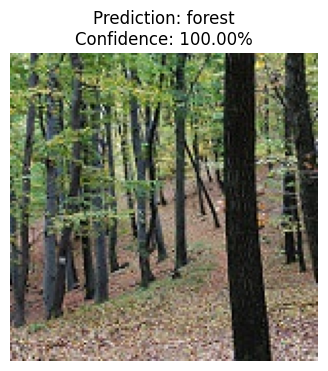

In [4]:

import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# 1. 저장된 모델 불러오기
# 경로가 다르다면 절대 경로로 수정하세요 
model = load_model(model_path)
print("모델을 성공적으로 불러왔습니다.")

# 클래스 이름 매핑 (학습할 때와 동일하게 맞춰야 함)
class_names = {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}

# 2. 예측할 이미지가 있는 폴더 경로

# 폴더 내의 모든 이미지 파일 목록 가져오기
pred_images = [f for f in os.listdir(pred_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if not pred_images:
    print(f"에러: {pred_dir} 경로에 이미지가 없습니다.")
else:
    # 3. 랜덤하게 이미지 1장 선택
    random_filename = random.choice(pred_images)
    img_path = os.path.join(pred_dir, random_filename)
    
    # 4. 이미지 불러오기 및 전처리
    # Xception 모델 학습 시 사용한 크기(150, 150)와 정규화(1./255) 적용
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0) # (1, 150, 150, 3)으로 차원 확장
    img_tensor /= 255.0                             # 픽셀값 스케일링
    
    # 5. 모델 예측 수행
    preds = model.predict(img_tensor)
    predicted_class_idx = np.argmax(preds[0])       # 확률이 제일 높은 인덱스
    predicted_class_name = class_names[predicted_class_idx]
    confidence = preds[0][predicted_class_idx] * 100
    
    # 6. 결과 시각화
    print(f"선택된 파일: {random_filename}")
    print(f"예측 결과: {predicted_class_name} (확률: {confidence:.2f}%)")
    
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class_name}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()


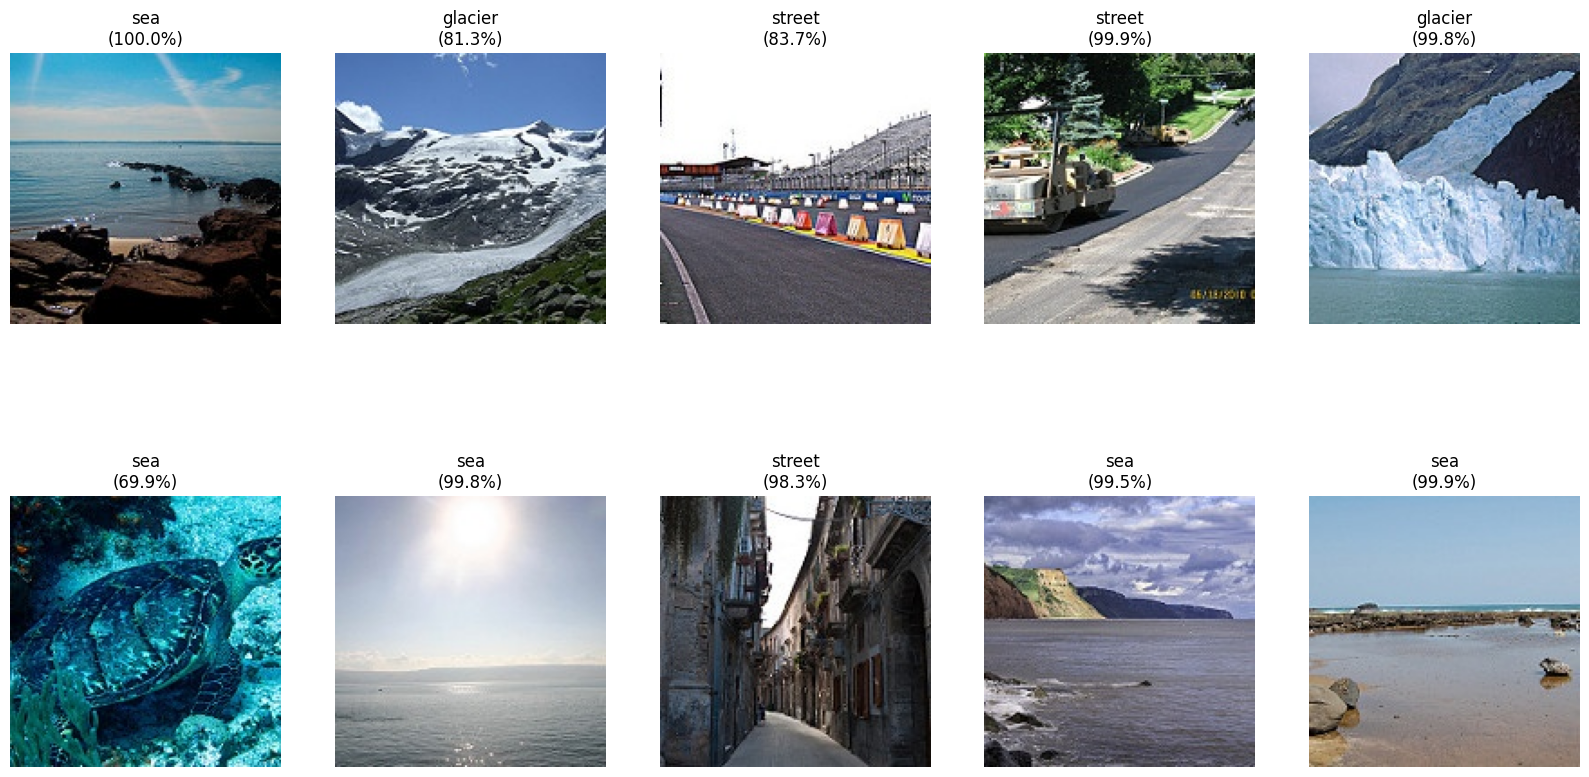

In [6]:
# 7. 10장 랜덤 선택 및 2행 5열 시각화
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 10장의 이미지를 리스트에서 무작위 비복원 추출 (중복 없이)
if len(pred_images) >= 10:
    random_filenames = random.sample(pred_images, 10)
else:
    random_filenames = pred_images

# 2행 5열 서브플롯 생성 - figsize의 세로 길이를 7에서 8로 늘림
fig, axes = plt.subplots(2, 5, figsize=(16, 8))
axes = axes.flatten() # 2차원 배열을 1차원으로 펼쳐서 루프 돌기 쉽게 변경

for i, filename in enumerate(random_filenames):
    img_path = os.path.join(pred_dir, filename)
    
    # 이미지 전처리
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.0
    
    # 예측 수행
    preds = model.predict(img_tensor, verbose=0) # 진행막대 출력 숨김
    predicted_class_idx = np.argmax(preds[0])
    predicted_class_name = class_names[predicted_class_idx]
    confidence = preds[0][predicted_class_idx] * 100
    
    # 해당 서브플롯에 시각화
    axes[i].imshow(img)
    axes[i].set_title(f"{predicted_class_name}\n({confidence:.1f}%)", fontsize=12)
    axes[i].axis('off') # 눈금 및 축 숨김

plt.tight_layout() # 그래프 간 간격 자동 조절
# tight_layout 이후에 서브플롯 간의 상하(hspace) 좌우(wspace) 간격 마진을 수동으로 조절
plt.subplots_adjust(hspace=0.4, wspace=0.2) 
plt.show()